In [1]:
import pandas as pd 
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
dss=pd.read_csv(r'C:\Users\dell\Downloads\Malignant Comments Classifier Project\train.csv')

In [3]:
dss

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [4]:
#using vector for converting the comment table into interger

In [5]:
#replace email address with email
dss['comment_text']=dss['comment_text'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddress')

In [6]:
#replace money symbol with 'moneysymb'
dss['comment_text']=dss['comment_text'].str.replace(r'€|\$','dollers')

In [7]:
#replace 10digit mobile number 
dss['comment_text']=dss['comment_text'].str.replace(r'^\(?[\d]{3}\)?[\d]{3}[\s-]?[\d]{4}$','phonenumber')

In [8]:
#remove punctuation
dss['comment_text']=dss['comment_text'].str.replace(r'[^\w\d\s]',' ')

In [9]:
#remove whitespace between terms with a sibgle space
dss['comment_text']=dss['comment_text'].str.replace(r'\s+',' ')

In [10]:
dss['comment_text']=dss['comment_text'].str.replace(r'^\s+|\s+?$','')

In [11]:
!pip install nltk

In [12]:
#remove stopwords
import string
import nltk
from nltk.corpus import stopwords

stop_words=set(stopwords.words('english')+['u','ur','4','2','im','dont','doin','ure'])
dss['comment_text']=dss['comment_text'].apply(lambda x:' '.join(
    term for term in x.split() if term not in stop_words))

In [13]:
import string
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:
#convert text into vector using tf-idf
from sklearn.feature_extraction.text import TfidfVectorizer
v=TfidfVectorizer()
x=v.fit_transform(dss['comment_text'])


In [15]:
from sklearn .preprocessing import LabelEncoder

In [16]:
le=LabelEncoder()
dss['comment_text']=le.fit_transform(dss['comment_text'])


In [17]:
dss['id']=le.fit_transform(dss['id'])

In [18]:
dss

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0,28734,0,0,0,0,0,0
1,1,22161,0,0,0,0,0,0
2,2,39344,0,0,0,0,0,0
3,4,73802,0,0,0,0,0,0
4,5,140844,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,159505,9753,0,0,0,0,0,0
159567,159510,138191,0,0,0,0,0,0
159568,159524,104698,0,0,0,0,0,0
159569,159535,9561,0,0,0,0,0,0


In [19]:
dss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype
---  ------            --------------   -----
 0   id                159571 non-null  int32
 1   comment_text      159571 non-null  int32
 2   malignant         159571 non-null  int64
 3   highly_malignant  159571 non-null  int64
 4   rude              159571 non-null  int64
 5   threat            159571 non-null  int64
 6   abuse             159571 non-null  int64
 7   loathe            159571 non-null  int64
dtypes: int32(2), int64(6)
memory usage: 8.5 MB


In [20]:
dss.shape

(159571, 8)

In [21]:
dss.columns

Index(['id', 'comment_text', 'malignant', 'highly_malignant', 'rude', 'threat',
       'abuse', 'loathe'],
      dtype='object')

In [22]:
dss.dtypes

id                  int32
comment_text        int32
malignant           int64
highly_malignant    int64
rude                int64
threat              int64
abuse               int64
loathe              int64
dtype: object

In [23]:
dss.isnull().sum()

id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64

<AxesSubplot:>

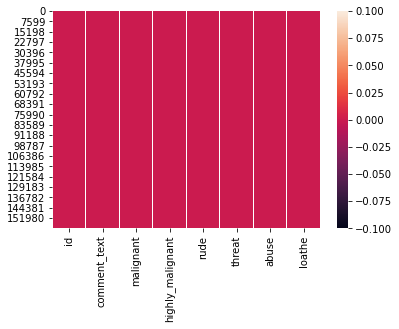

In [24]:
sb.heatmap(dss.isnull())

In [25]:
dss.describe()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
count,159571.00000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,79785.00000,79448.971605,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,46064.32424,45811.696796,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39892.50000,39772.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,79785.00000,79572.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,119677.50000,119096.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,159570.00000,158739.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

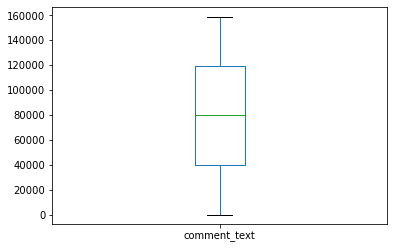

In [26]:
#eda process
#univariate analysis
dss['comment_text'].plot.box()

<AxesSubplot:>

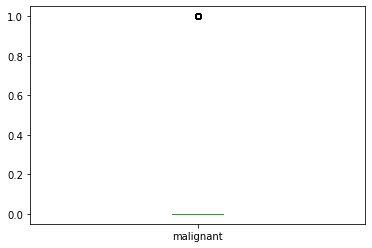

In [27]:
dss['malignant'].plot.box()

<AxesSubplot:>

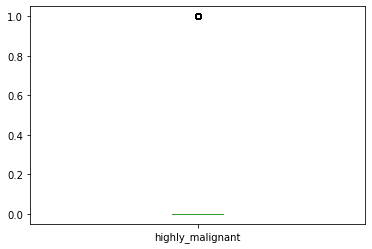

In [28]:
dss['highly_malignant'].plot.box()

<AxesSubplot:>

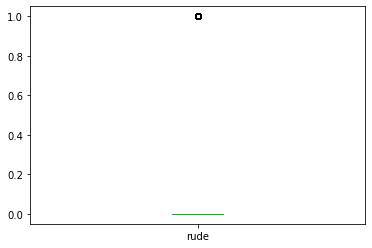

In [29]:
dss['rude'].plot.box()

In [30]:
#as we can see here there is no more outliears present in the datasets

<AxesSubplot:xlabel='id'>

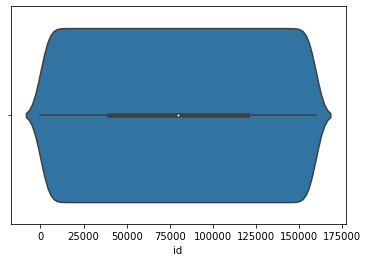

In [31]:
sb.violinplot(x="id",data=dss)

<AxesSubplot:xlabel='comment_text'>

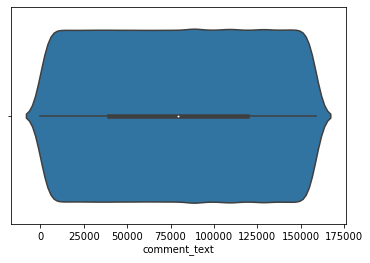

In [32]:
sb.violinplot(x="comment_text",data=dss)

<AxesSubplot:xlabel='rude'>

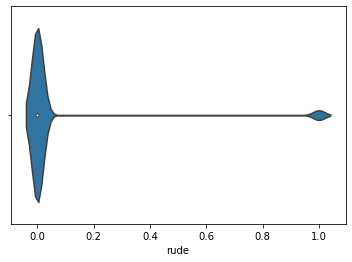

In [33]:
sb.violinplot(x="rude",data=dss)

<AxesSubplot:xlabel='malignant'>

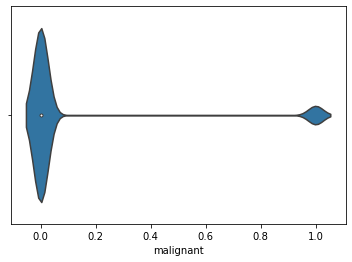

In [34]:
sb.violinplot(x="malignant",data=dss)

<AxesSubplot:xlabel='highly_malignant'>

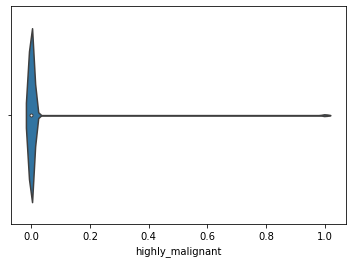

In [35]:
sb.violinplot(x="highly_malignant",data=dss)

<AxesSubplot:xlabel='loathe', ylabel='Density'>

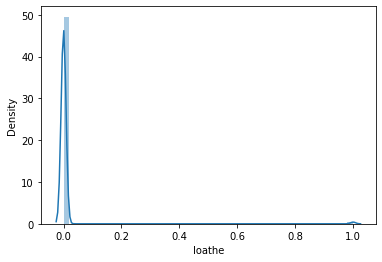

In [36]:
sb.distplot(dss['loathe'])

<AxesSubplot:xlabel='abuse'>

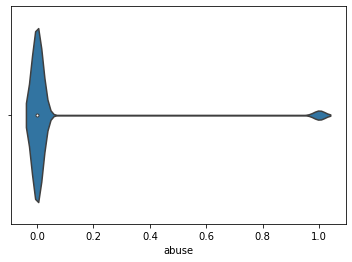

In [37]:
sb.violinplot(x="abuse",data=dss)

<AxesSubplot:xlabel='comment_text', ylabel='malignant'>

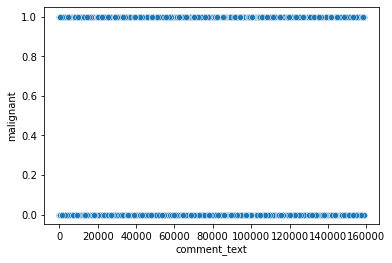

In [38]:
sb.scatterplot(data=dss,x='comment_text',y='malignant')

<AxesSubplot:xlabel='id', ylabel='threat'>

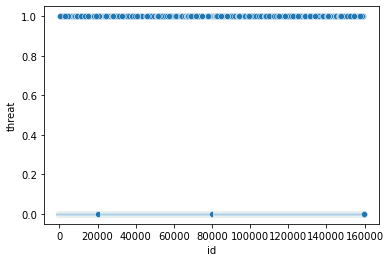

In [39]:
sb.scatterplot(data=dss,x='id',y='threat')

<AxesSubplot:xlabel='loathe', ylabel='abuse'>

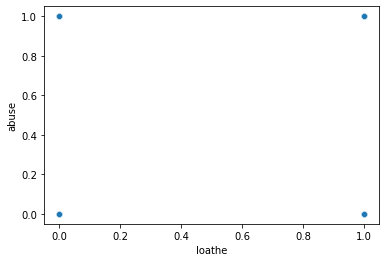

In [40]:
sb.scatterplot(data=dss,x='loathe',y='abuse')

<AxesSubplot:xlabel='malignant', ylabel='highly_malignant'>

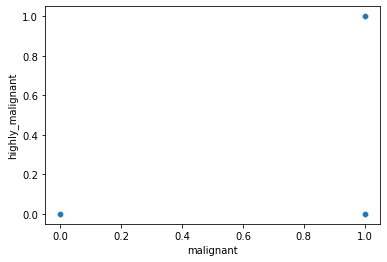

In [41]:
sb.scatterplot(data=dss,x='malignant',y='highly_malignant')

<AxesSubplot:xlabel='loathe', ylabel='Count'>

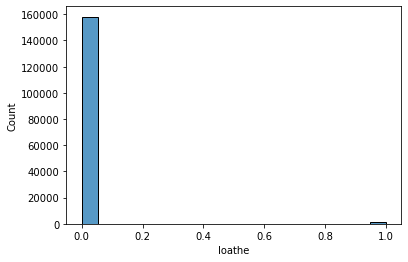

In [42]:
sb.histplot(dss['loathe'])

<AxesSubplot:xlabel='rude', ylabel='Count'>

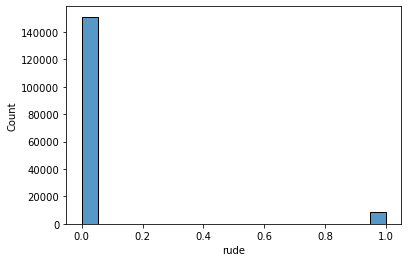

In [43]:
sb.histplot(dss['rude'])

<AxesSubplot:xlabel='threat', ylabel='Count'>

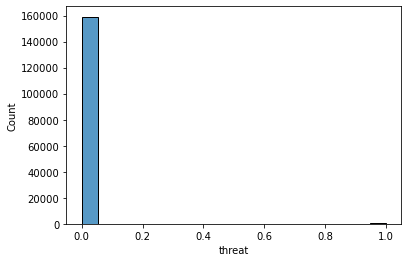

In [44]:
sb.histplot(dss['threat'])

In [45]:
x=dss.drop(columns=["comment_text"])
y=dss[["comment_text"]]

In [46]:
x.shape

(159571, 7)

In [47]:
y.shape

(159571, 1)

In [48]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=137)

In [49]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(119678, 7)
(39893, 7)
(119678, 1)
(39893, 1)


In [54]:
dss

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0,28734,0,0,0,0,0,0
1,1,22161,0,0,0,0,0,0
2,2,39344,0,0,0,0,0,0
3,4,73802,0,0,0,0,0,0
4,5,140844,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,159505,9753,0,0,0,0,0,0
159567,159510,138191,0,0,0,0,0,0
159568,159524,104698,0,0,0,0,0,0
159569,159535,9561,0,0,0,0,0,0


In [55]:
from sklearn.linear_model import LinearRegression

In [56]:
lm=LinearRegression()

In [57]:
lm.fit(x_train,y_train)

LinearRegression()

In [58]:
lm.coef_

array([[ 2.05312658e-03,  8.21562677e+03, -5.21560740e+02,
        -9.86115568e+02, -5.09071706e+03,  4.77180682e+03,
        -1.02652980e+03]])

In [59]:
lm.intercept_

array([78470.8956133])

In [60]:
lm.score(x_train,y_train)

0.004125327277287538

In [61]:
#predict the value
pred=lm.predict(x_test)
print("predicted result price:y_test")
print("actual price ",y_test)

predicted result price:y_test
actual price          comment_text
20385         121836
125453         36548
120591        140631
75818          63453
98044         154358
...              ...
24554          46272
83037          97558
29068          89548
23528         100949
14277          61707

[39893 rows x 1 columns]


In [62]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [64]:
print('error:')
print('mean absolute error:',mean_absolute_error(y_test,pred))
print('mean squared error:',mean_squared_error(y_test,pred))

error:
mean absolute error: 39616.19679510677
mean squared error: 2092187093.0618474


In [65]:
from sklearn.metrics import r2_score
print(r2_score(y_test,pred))

0.0038142422685962796


In [66]:
from sklearn.linear_model import Lasso,Ridge
ls=Lasso(alpha=0.0001)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)

0.0041253272772842076

In [67]:
ls.coef_

array([ 2.05312656e-03,  8.21562320e+03, -5.21551258e+02, -9.86107954e+02,
       -5.09068402e+03,  4.77179732e+03, -1.02651745e+03])

In [68]:
#try to minimize the coeficient variance
rd=Ridge(alpha=0.0001)
#rd=rodge()
rd.fit(x_train,y_train)
rd.score(x_train,y_train)

0.004125327277287649

In [69]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=100,random_state=137)
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)

In [70]:
rf.score(x_train,y_train)

0.7993972448696267

In [71]:
import joblib
joblib.dump(rf,"rfmodelobj")

['rfmodelobj']